In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

In [68]:
data = pd.read_csv(r'.../ADEM/data_clean_HMWRK2.csv', sep=',')

In [69]:
# Drop index col
data = data.drop(['Unnamed: 0', 'nr'], axis=1)

In [70]:
# Quick look at the data
data.head(3)

,IUIO1,IUIO2,IUIO3,IUIO4,IUIO5,IUIO6,IUIO7,IUIO8,IUIO9,IUIO10,...,IUIO27,IUIO28,IUIO29,IUIO30,IUIO31,IUIO32,IUIO33,p69,p70a,DATA
0,3,4,3,4,3,3,4,3,3,2,...,4,3,2,4,4,3,5,1,1967,1
1,3,4,3,4,5,2,4,2,5,4,...,4,2,2,2,4,2,4,2,1968,1
2,2,2,3,4,4,4,2,4,4,3,...,4,3,2,4,4,2,4,2,1965,1


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 36 columns):
IUIO1     2757 non-null int64
IUIO2     2757 non-null int64
IUIO3     2757 non-null int64
IUIO4     2757 non-null int64
IUIO5     2757 non-null int64
IUIO6     2757 non-null int64
IUIO7     2757 non-null int64
IUIO8     2757 non-null int64
IUIO9     2757 non-null int64
IUIO10    2757 non-null int64
IUIO11    2757 non-null int64
IUIO12    2757 non-null int64
IUIO13    2757 non-null int64
IUIO14    2757 non-null int64
IUIO15    2757 non-null int64
IUIO16    2757 non-null int64
IUIO17    2757 non-null int64
IUIO18    2757 non-null int64
IUIO19    2757 non-null int64
IUIO20    2757 non-null int64
IUIO21    2757 non-null int64
IUIO22    2757 non-null int64
IUIO23    2757 non-null int64
IUIO24    2757 non-null int64
IUIO25    2757 non-null int64
IUIO26    2757 non-null int64
IUIO27    2757 non-null int64
IUIO28    2757 non-null int64
IUIO29    2757 non-null int64
IUIO30    2757 non-null

In [72]:
# Split data into sub-sets
study_1 = data[data.DATA == 1].drop('DATA', axis=1)
study_2 = data[data.DATA == 2].drop('DATA', axis=1)
study_3 = data[data.DATA == 3].drop('DATA', axis=1)

In [73]:
cor_1 = study_1.corr()
cor_2 = study_2.corr()
cor_3 = study_3.corr()

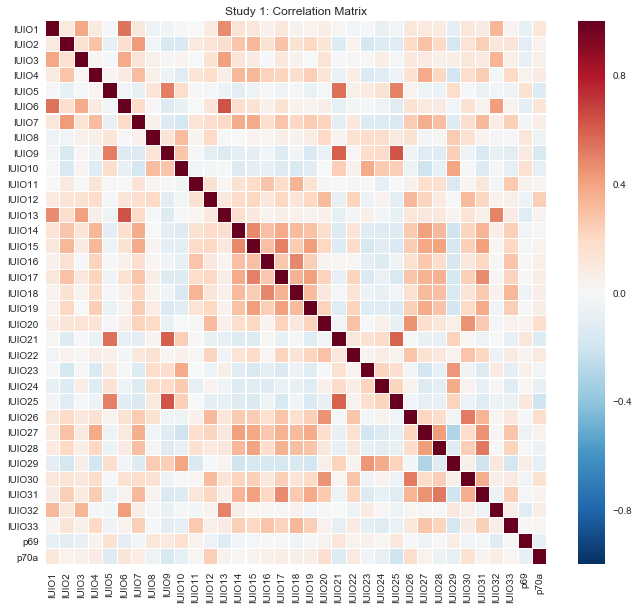

In [74]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.heatmap(cor_1, linewidths=0.1, cmap="RdBu_r", vmin=-1, vmax=1)
plt.title('Study 1: Correlation Matrix')
plt.show()

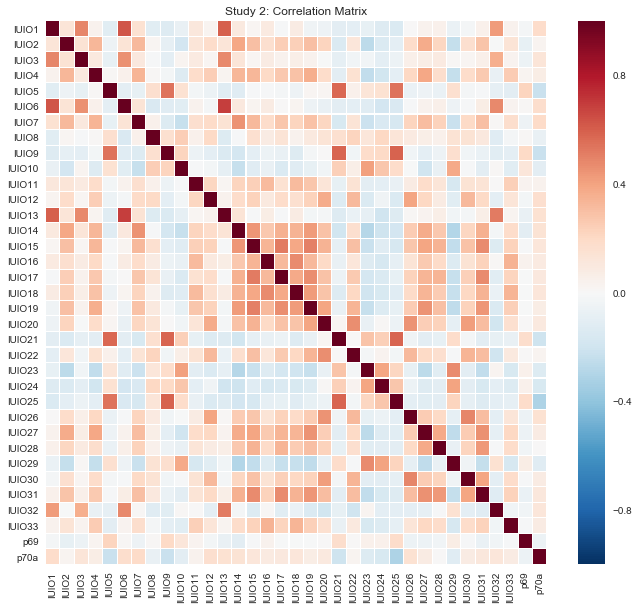

In [75]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.heatmap(cor_2, linewidths=0.1, cmap="RdBu_r", vmin=-1, vmax=1)
plt.title('Study 2: Correlation Matrix')
plt.show()

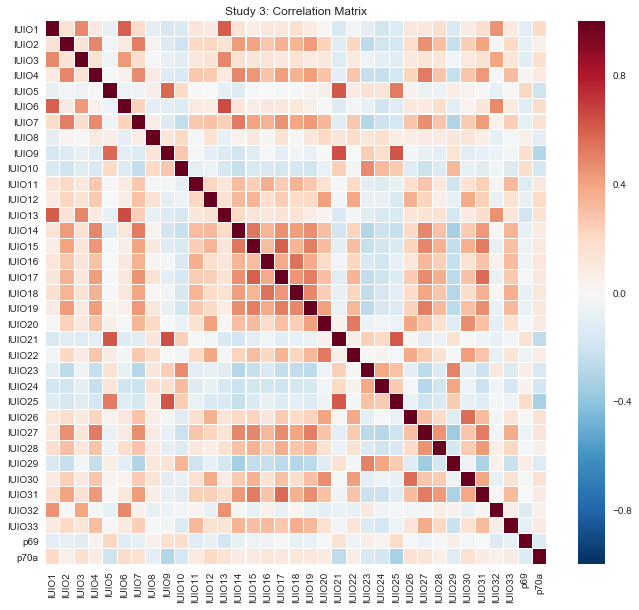

In [76]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.heatmap(cor_3, linewidths=0.1, cmap="RdBu_r", vmin=-1, vmax=1)
plt.title('Study 3: Correlation Matrix')
plt.show()

In [90]:
# Check for normality
for i in data.columns:
    if i.startswith('IU'):
        print(f'{i}: {stats.shapiro(data[i])}')

IUIO1: (0.880875825881958, 9.203728313685399e-42)
IUIO2: (0.8181557655334473, 0.0)
IUIO3: (0.9020666480064392, 7.541600561001946e-39)
IUIO4: (0.7610516548156738, 0.0)
IUIO5: (0.8960591554641724, 1.0081767918446686e-39)
IUIO6: (0.8853943347930908, 3.530151091327079e-41)
IUIO7: (0.8105225563049316, 0.0)
IUIO8: (0.8986448645591736, 2.368988940938213e-39)
IUIO9: (0.8893373608589172, 1.182317553304778e-40)
IUIO10: (0.8977584838867188, 1.7641170575139414e-39)
IUIO11: (0.8173150420188904, 0.0)
IUIO12: (0.8445655703544617, 0.0)
IUIO13: (0.8950139880180359, 7.1726723065083654e-40)
IUIO14: (0.7797380685806274, 0.0)
IUIO15: (0.7627338767051697, 0.0)
IUIO16: (0.7908393740653992, 0.0)
IUIO17: (0.783983588218689, 0.0)
IUIO18: (0.784367561340332, 0.0)
IUIO19: (0.745158314704895, 0.0)
IUIO20: (0.8559196591377258, 1.1210387714598537e-44)
IUIO21: (0.9017055034637451, 6.663772552308772e-39)
IUIO22: (0.8156876564025879, 0.0)
IUIO23: (0.8820634484291077, 1.3050292598257021e-41)
IUIO24: (0.8913434743881226,

In [99]:
studies = [study_1, study_2, study_3]

for n, i in enumerate(studies):
    print(f'Study {n+1}: {i.shape[0] / i.shape[1]}')

Study 1: 25.285714285714285
Study 2: 26.542857142857144
Study 3: 26.942857142857143


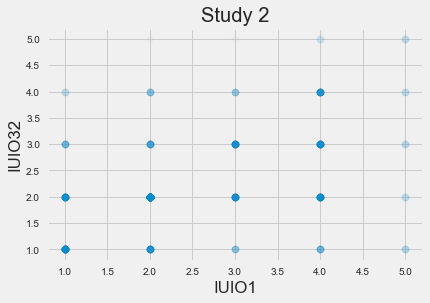

In [125]:
a = np.random.choice(study_2.columns)
b = np.random.choice(study_2.columns)
plt.scatter(study_2[a], study_2[b], alpha=.03)
plt.xlabel(a)
plt.ylabel(b)
plt.title('Study 2')
plt.show()